In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
archive_path = '/content/drive/MyDrive/archive'

Here, we are using the Transfer Learning Model VGG16.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


In [4]:
train_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/Train'
validation_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/valid'
test_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/test'


In [5]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))


58889256/58889256 [==============================] - 0s 0us/step


In [8]:
for layer in base_model.layers:
    layer.trainable = False


In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # Assuming 6 classes for jellyfish dataset


In [10]:
model = Model(inputs=base_model.input, outputs=predictions)


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)


Epoch 1/20
29/29 [==============================] - 678s 23s/step - loss: 1.6934 - accuracy: 0.3189 - val_loss: 1.5000 - val_accuracy: 0.4359
Epoch 2/20
29/29 [==============================] - 629s 22s/step - loss: 1.3252 - accuracy: 0.5678 - val_loss: 1.2856 - val_accuracy: 0.5128
Epoch 3/20
29/29 [==============================] - 633s 22s/step - loss: 1.1243 - accuracy: 0.6311 - val_loss: 1.2224 - val_accuracy: 0.6154
Epoch 4/20
29/29 [==============================] - 630s 22s/step - loss: 0.9588 - accuracy: 0.7033 - val_loss: 1.2184 - val_accuracy: 0.5897
Epoch 5/20
29/29 [==============================] - 632s 22s/step - loss: 0.8568 - accuracy: 0.7367 - val_loss: 1.1080 - val_accuracy: 0.6410
Epoch 6/20
29/29 [==============================] - 616s 21s/step - loss: 0.7795 - accuracy: 0.7556 - val_loss: 1.1168 - val_accuracy: 0.5897
Epoch 7/20
29/29 [==============================] - 614s 21s/step - loss: 0.7344 - accuracy: 0.7489 - val_loss: 1.1989 - val_accuracy: 0.6410
Epoch 

In [13]:
# Define the file path where you want to save the model
model_path = "Train-2.ipynb.h5"

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: Train-2.ipynb.h5


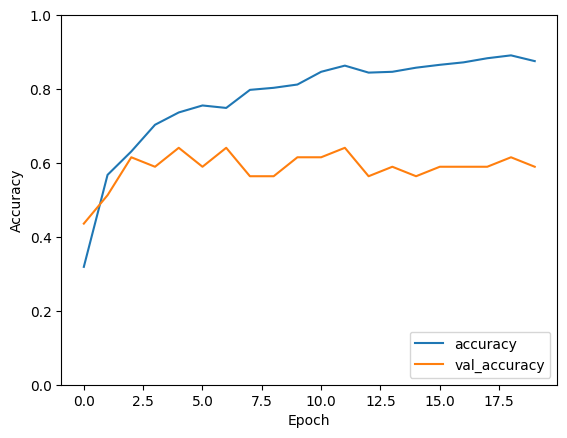

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Comments:

Training Accuracy:
The training accuracy rising from 0.3 to 0.8 indicates that the model's performance on the training data improves significantly during training. This means that the model is learning from the training data and becoming better at predicting it.

Validation Accuracy:
The validation accuracy rising from 0.4 to 0.6 suggests that the model's performance on unseen validation data also improves during training, but to a lesser extent compared to the training data. While the validation accuracy does increase, it lags behind the training accuracy, indicating that the model may not generalize as well to unseen data as it does to the training data.